In [1]:
# import dependencies
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('json') # enable large dataset 

DataTransformerRegistry.enable('json')

In [2]:
# read the full home price data
read = pd.read_csv("Beijing_homeprice_2011_2017/BJ_houseprice_final2_edit.csv", engine='python')
read.head()

,锘縤ndex,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,...,pop,migrant_pop,pop_dens,GDP,CLI,BCI,CCI,PPI,EPUI,RI
0,0,https://bj.lianjia.com/chengjiao/101084782030....,1.01085E+11,116.475489,40.019520,1.111030e+12,2016-08-09,1464.0,106,415.0,...,385.6,174.8,8473.0,15485.20073,100.3106,98.95145,98.52688,-0.8,288.78021,1.0
1,1,https://bj.lianjia.com/chengjiao/101086012217....,1.01086E+11,116.453917,39.881534,1.111030e+12,2016-07-28,903.0,126,575.0,...,385.6,174.8,8473.0,15485.20073,100.2355,98.83202,98.27962,-1.7,558.22217,1.0
2,2,https://bj.lianjia.com/chengjiao/101086041636....,1.01086E+11,116.561978,39.877145,1.111040e+12,2016-12-11,1271.0,48,1030.0,...,385.6,174.8,8473.0,15485.20073,100.5958,99.55722,99.64436,5.5,646.91101,0.0
3,3,https://bj.lianjia.com/chengjiao/101086406841....,1.01086E+11,116.438010,40.076114,1.111040e+12,2016-09-30,965.0,138,297.5,...,201.0,103.8,1496.0,15485.20073,100.3823,99.12286,98.67056,0.1,388.74960,1.0
4,4,https://bj.lianjia.com/chengjiao/101086920653....,1.01087E+11,116.428392,39.886229,1.111030e+12,2016-08-28,927.0,286,392.0,...,87.8,19.2,20975.0,15485.20073,100.3106,98.95145,98.52688,-0.8,288.78021,1.0


In [3]:
list(read)

['锘縤ndex',
 'url',
 'id',
 'Lng',
 'Lat',
 'Cid',
 'tradeTime',
 'DOM',
 'followers',
 'totalPrice',
 'price',
 'square',
 'bedRoom',
 'livingRoom',
 'kitchen',
 'bathRoom',
 'onFloor',
 'totalFloor',
 'buildingType',
 'constructionTime',
 'renovationCondition',
 'buildingStructure',
 'ladderRatio',
 'elevator',
 'fiveYearsProperty',
 'subway',
 'district_x',
 'communityAverage',
 'district_name',
 'Lng_transed',
 'Lat_transed',
 'year',
 'month',
 'district_y',
 'pop',
 'migrant_pop',
 'pop_dens',
 'GDP',
 'CLI',
 'BCI',
 'CCI',
 'PPI',
 'EPUI',
 'RI']

In [4]:
# filter dates in 2011-2018 and drop NA
filtered = read.loc[(read['year']>2010) & (read['year']<=2018)].dropna()
filtered.head()

,锘縤ndex,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,...,pop,migrant_pop,pop_dens,GDP,CLI,BCI,CCI,PPI,EPUI,RI
0,0,https://bj.lianjia.com/chengjiao/101084782030....,1.01085E+11,116.475489,40.019520,1.111030e+12,2016-08-09,1464.0,106,415.0,...,385.6,174.8,8473.0,15485.20073,100.3106,98.95145,98.52688,-0.8,288.78021,1.0
1,1,https://bj.lianjia.com/chengjiao/101086012217....,1.01086E+11,116.453917,39.881534,1.111030e+12,2016-07-28,903.0,126,575.0,...,385.6,174.8,8473.0,15485.20073,100.2355,98.83202,98.27962,-1.7,558.22217,1.0
2,2,https://bj.lianjia.com/chengjiao/101086041636....,1.01086E+11,116.561978,39.877145,1.111040e+12,2016-12-11,1271.0,48,1030.0,...,385.6,174.8,8473.0,15485.20073,100.5958,99.55722,99.64436,5.5,646.91101,0.0
3,3,https://bj.lianjia.com/chengjiao/101086406841....,1.01086E+11,116.438010,40.076114,1.111040e+12,2016-09-30,965.0,138,297.5,...,201.0,103.8,1496.0,15485.20073,100.3823,99.12286,98.67056,0.1,388.74960,1.0
4,4,https://bj.lianjia.com/chengjiao/101086920653....,1.01087E+11,116.428392,39.886229,1.111030e+12,2016-08-28,927.0,286,392.0,...,87.8,19.2,20975.0,15485.20073,100.3106,98.95145,98.52688,-0.8,288.78021,1.0


In [65]:
# average home price per year and per month
ave_price = filtered.groupby(['year', 'month'])['price'].mean().astype(int).reset_index()
ave_price['price2'] = ave_price['price'].apply(lambda x: '{0:,d}'.format(x))
ave_price['date'] = pd.to_datetime(ave_price[['year', 'month']].assign(Day=1))

ave_price.head()

,year,month,price,price2,date
0,2011,1,20614,"20,614",2011-01-01
1,2011,2,20139,"20,139",2011-02-01
2,2011,3,19646,"19,646",2011-03-01
3,2011,4,19261,"19,261",2011-04-01
4,2011,5,17765,"17,765",2011-05-01


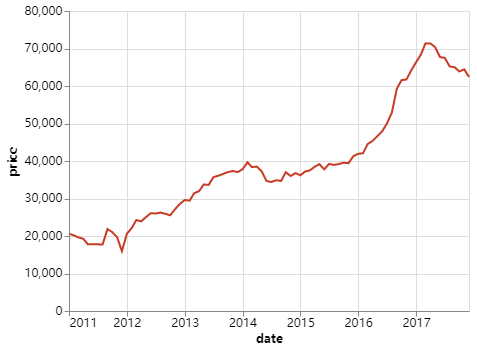

In [67]:
# plot average price per month
# basic line
line = alt.Chart().mark_line(color='#C93B25').encode(
    x='date:T', y='price:Q',
    tooltip=[alt.Tooltip('price2:N', title='Price/m²'), alt.Tooltip('date:T', timeUnit='yearmonth', title='Date')])


# add interactive line tooltips: https://altair-viz.github.io/gallery/multiline_tooltip.html
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# Transparent selectors across the chart. This is what tells us the x-value of the cursor
selectors = alt.Chart().mark_point(color='#C93B25').encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point(color='#C93B25').encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

# Put the layers into a chart and bind the data
line_price = alt.layer(line, selectors, points, rules, data=ave_price)
line_price

In [72]:
line_price.save('E:/Study-19Spring/CPLN680-AdvancedGIS/CPLN680-AdvancedGIS-web-application/altair_charts/line_price.json')

In [69]:
# plot monthly home price by districts
# average home price per year and per month and per district
price_dist = filtered.groupby(['year', 'month', 'district_name'])['price'].mean().astype(int).reset_index()
price_dist['price2'] = price_dist['price'].apply(lambda x: '{0:,d}'.format(x))
price_dist['date'] = pd.to_datetime(price_dist[['year', 'month']].assign(Day=1))

price_dist.head()

,year,month,district_name,price,price2,date
0,2011,1,Mentougou,20614,"20,614",2011-01-01
1,2011,2,Mentougou,20139,"20,139",2011-02-01
2,2011,3,Mentougou,19646,"19,646",2011-03-01
3,2011,4,Mentougou,19261,"19,261",2011-04-01
4,2011,5,Mentougou,17765,"17,765",2011-05-01


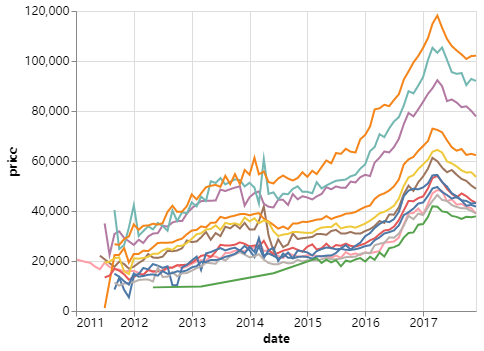

In [70]:
# altair plot
# basic line
line = alt.Chart().mark_line().encode(
    x='date:T', y='price:Q', color=alt.Color('district_name:N', legend=None), # exclude legend - they are annoying
    tooltip=[alt.Tooltip('price2:N', title='Price/m²'), 
             alt.Tooltip('date:T', timeUnit='yearmonth', title='Date'), 
             alt.Tooltip('district_name:N', title="District")])


# add interactive line tooltips: https://altair-viz.github.io/gallery/multiline_tooltip.html
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# Transparent selectors across the chart. This is what tells us the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

# Put the layers into a chart and bind the data
line_price_dist = alt.layer(line, selectors, points, rules, data=price_dist)
line_price_dist

In [71]:
line_price_dist.save('E:/Study-19Spring/CPLN680-AdvancedGIS/CPLN680-AdvancedGIS-web-application/altair_charts/line_price_dist.json')

In [58]:
# average total price per year and per month
ave_totalprice = filtered.groupby(['year', 'month'])['totalPrice'].mean().astype(int).reset_index()
ave_totalprice['totalPrice'] = ave_totalprice['totalPrice'].apply(lambda x: x*10000)
ave_totalprice['total_price'] = ave_totalprice['totalPrice'].apply(lambda x: '{0:,d}'.format(x))
ave_totalprice['date'] = pd.to_datetime(ave_totalprice[['year', 'month']].assign(Day=1))

ave_totalprice.head()

,year,month,totalPrice,total_price,date
0,2011,1,1580000,"1,580,000",2011-01-01
1,2011,2,1980000,"1,980,000",2011-02-01
2,2011,3,1790000,"1,790,000",2011-03-01
3,2011,4,2010000,"2,010,000",2011-04-01
4,2011,5,1600000,"1,600,000",2011-05-01


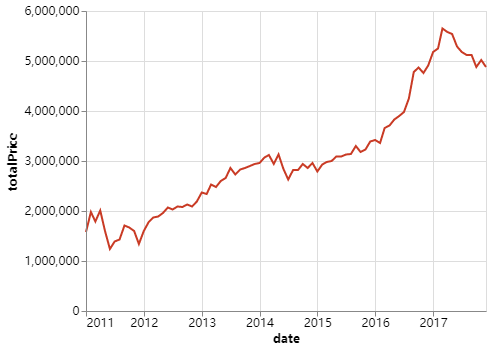

In [59]:
# plot total price per month
# basic line
line = alt.Chart().mark_line(color='#C93B25').encode(
    x='date:T', y='totalPrice:Q',
    tooltip=[alt.Tooltip('total_price:N', title='Total Price'), alt.Tooltip('date:T', timeUnit='yearmonth', title='Date')]).properties(width=400)


# add interactive line tooltips: https://altair-viz.github.io/gallery/multiline_tooltip.html
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# Transparent selectors across the chart. This is what tells us the x-value of the cursor
selectors = alt.Chart().mark_point(color='#C93B25').encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point(color='#C93B25').encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

# Put the layers into a chart and bind the data
line_totalprice = alt.layer(line, selectors, points, rules, data=ave_totalprice)
line_totalprice

In [60]:
line_totalprice.save('E:/Study-19Spring/CPLN680-AdvancedGIS/CPLN680-AdvancedGIS-web-application/altair_charts/line_totalprice.json')

In [62]:
# plot monthly total price by districts
# average total price per year and per month and per district
totalprice_dist = filtered.groupby(['year', 'month', 'district_name'])['totalPrice'].mean().astype(int).reset_index()
totalprice_dist['totalPrice'] = totalprice_dist['totalPrice'].apply(lambda x: x*10000)
totalprice_dist['total_price'] = totalprice_dist['totalPrice'].apply(lambda x: '{0:,d}'.format(x))
totalprice_dist['date'] = pd.to_datetime(price_dist[['year', 'month']].assign(Day=1))


totalprice_dist.head()

,year,month,district_name,totalPrice,total_price,date
0,2011,1,Mentougou,1580000,"1,580,000",2011-01-01
1,2011,2,Mentougou,1980000,"1,980,000",2011-02-01
2,2011,3,Mentougou,1790000,"1,790,000",2011-03-01
3,2011,4,Mentougou,2010000,"2,010,000",2011-04-01
4,2011,5,Mentougou,1600000,"1,600,000",2011-05-01


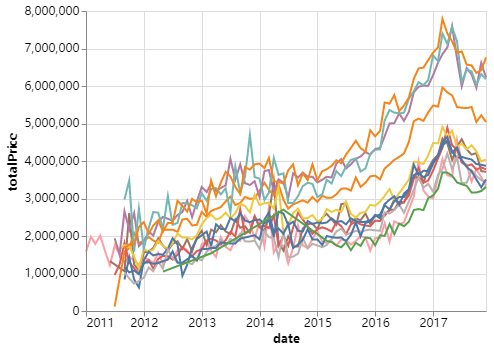

In [63]:
# altair plot
# basic line
line = alt.Chart().mark_line().encode(
    x='date:T', y='totalPrice:Q', color=alt.Color('district_name:N', legend=None),
    tooltip=[alt.Tooltip('total_price:N', title='Total Price'), 
             alt.Tooltip('date:T', timeUnit='yearmonth', title='Date'), 
             alt.Tooltip('district_name:N', title="District")]).properties(width=400)


# add interactive line tooltips: https://altair-viz.github.io/gallery/multiline_tooltip.html
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# Transparent selectors across the chart. This is what tells us the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

# Put the layers into a chart and bind the data
line_totalprice_dist = alt.layer(line, selectors, points, rules, data=totalprice_dist)
line_totalprice_dist

In [64]:
line_totalprice_dist.save('E:/Study-19Spring/CPLN680-AdvancedGIS/CPLN680-AdvancedGIS-web-application/altair_charts/line_totalprice_dist.json')

In [17]:
# average home price per year and per month
ave_DOM = filtered.groupby(['year', 'month'])['DOM'].mean().round().reset_index()
ave_DOM['DOM'] = ave_DOM['DOM'].apply(lambda x: int(x))
ave_DOM['date'] = pd.to_datetime(ave_DOM[['year', 'month']].assign(Day=1))

ave_DOM.head()

,year,month,DOM,date
0,2011,1,1,2011-01-01
1,2011,2,1,2011-02-01
2,2011,3,1,2011-03-01
3,2011,4,1,2011-04-01
4,2011,5,1,2011-05-01


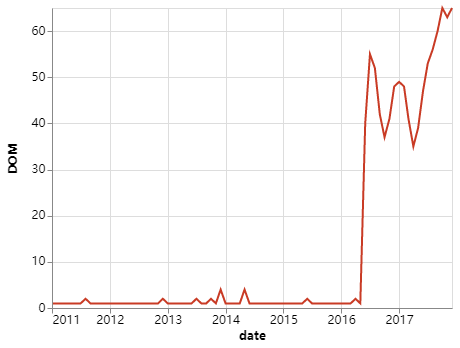

In [18]:
# Average DOM
# basic line
line = alt.Chart().mark_line(color='#C93B25').encode(
    x='date:T', y='DOM:Q',
    tooltip=[alt.Tooltip('DOM:Q', title='DOM'), alt.Tooltip('date:T', timeUnit='yearmonth', title='Date')]).properties(width=400)


# add interactive line tooltips: https://altair-viz.github.io/gallery/multiline_tooltip.html
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# Transparent selectors across the chart. This is what tells us the x-value of the cursor
selectors = alt.Chart().mark_point(color='#C93B25').encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point(color='#C93B25').encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

# Put the layers into a chart and bind the data
line_DOM = alt.layer(line, selectors, points, rules, data=ave_DOM)
line_DOM

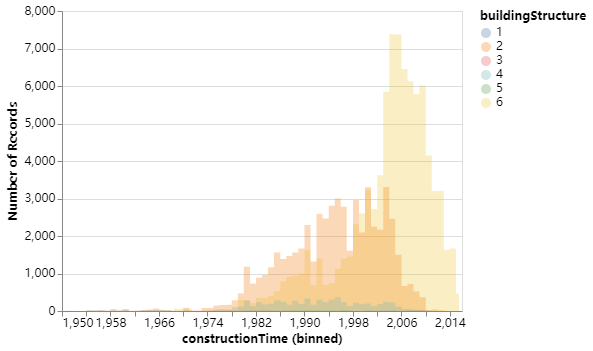

In [19]:
alt.Chart(filtered).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('constructionTime:Q', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color('buildingStructure:N')
)

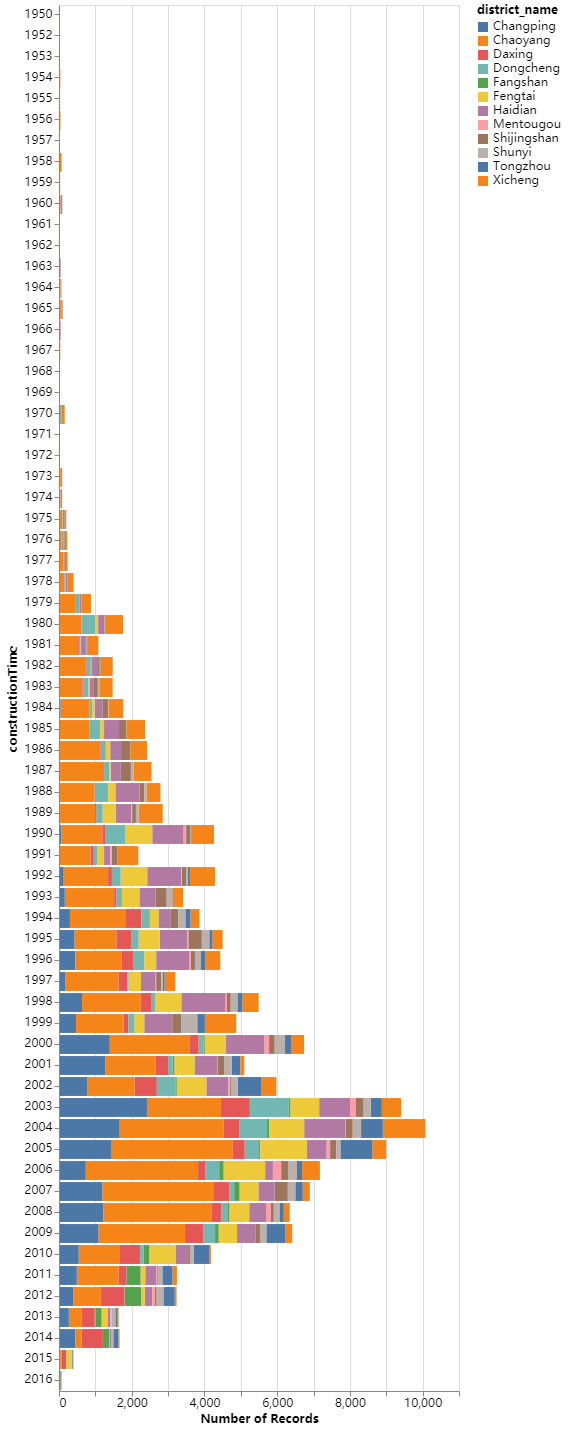

In [20]:
# plot price-constructionTime grouped by districts
bar_const = alt.Chart(filtered).mark_bar().encode(
    x = 'count(*):Q', y = 'constructionTime:O', color = 'district_name',
    order = alt.Order('district_name:N', sort='ascending'),
    tooltip = [alt.Tooltip('district_name', title = 'District'),
               alt.Tooltip('count(*):Q', title = 'Number of Transaction')])

bar_const

In [73]:
bar_const.save('E:/Study-19Spring/CPLN680-AdvancedGIS/CPLN680-AdvancedGIS-web-application/large_altair/construction_barplot.json')

In [22]:
bedroom = filtered.groupby(['district_name','bedRoom']).size().reset_index().rename(columns={0:'count'})
bathroom = filtered.groupby(['district_name','bathRoom']).size().reset_index().rename(columns={0:'count'})
bathroom['count'] = bathroom['count'].apply(lambda x: int(x))

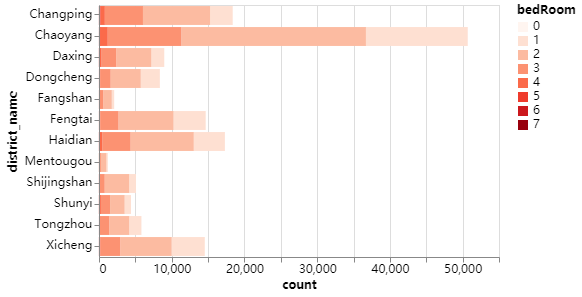

In [23]:
bedroom_plot = alt.Chart(bedroom).mark_bar().encode(
    x='count:Q',
    y='district_name:N',
    color=alt.Color('bedRoom:O', scale=alt.Scale(scheme='reds')),
    tooltip=[alt.Tooltip('count:Q', title='Number of Transaction'), alt.Tooltip('bedRoom:O', title='Bedrooms')]
)
bedroom_plot

In [75]:
bedroom_plot.save('E:/Study-19Spring/CPLN680-AdvancedGIS/CPLN680-AdvancedGIS-web-application/altair_charts/bedroom_plot.json')

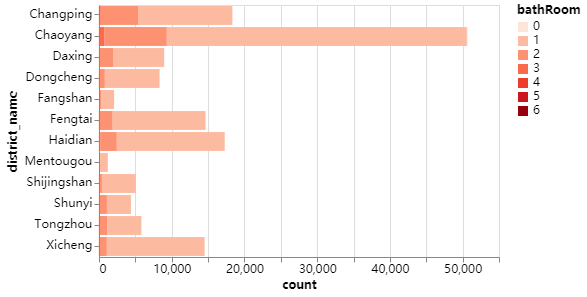

In [25]:
bathroom_plot = alt.Chart(bathroom).mark_bar().encode(
    x='count:Q',
    y='district_name:N',
    color=alt.Color('bathRoom:O', scale=alt.Scale(scheme='reds')),
    tooltip=[alt.Tooltip('count:Q', title='Number of Transaction'), alt.Tooltip('bathRoom:O', title='Bathrooms')]
)
bathroom_plot

In [26]:
bathroom_plot.save('E:/Study-19Spring/CPLN680-AdvancedGIS/CPLN680-AdvancedGIS-web-application/altair_charts/bathroom_plot.json')

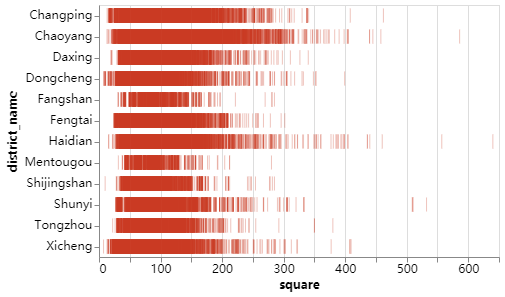

In [27]:
# area_plot = alt.Chart(filtered).mark_bar().encode(
#     x='square:Q',
#     y='district_name:N',
#     tooltip=[alt.Tooltip('square:Q', title='Area')]
# )
# area_plot


area_plot = alt.Chart(filtered).mark_tick(
    color='#C93B25', opacity=0.3).encode(
    x='square:Q',
    y='district_name:N',
    tooltip=[alt.Tooltip('district_name:N', title='District'), alt.Tooltip('square:Q', title='Area (sq m)')]
)
area_plot

In [76]:
area_plot.save('E:/Study-19Spring/CPLN680-AdvancedGIS/CPLN680-AdvancedGIS-web-application/large_altair/area_plot.json')

## Convert to geodataframe

In [29]:
# convert to geodataframe and plot it
import geopandas as gpd
from shapely.geometry import Point

read['coord'] = list(zip(read['Lng_transed'], read['Lat_transed']))
read['coord'] = read['coord'].apply(Point)
read_gdf = gpd.GeoDataFrame(read, geometry='coord', crs={'init':'epsg:4326'})
read_gdf.head()

,锘縤ndex,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,...,migrant_pop,pop_dens,GDP,CLI,BCI,CCI,PPI,EPUI,RI,coord
0,0,https://bj.lianjia.com/chengjiao/101084782030....,1.01085E+11,116.475489,40.019520,1.111030e+12,2016-08-09,1464.0,106,415.0,...,174.8,8473.0,15485.20073,100.3106,98.95145,98.52688,-0.8,288.78021,1.0,POINT (116.4627417718231 40.01251442164335)
1,1,https://bj.lianjia.com/chengjiao/101086012217....,1.01086E+11,116.453917,39.881534,1.111030e+12,2016-07-28,903.0,126,575.0,...,174.8,8473.0,15485.20073,100.2355,98.83202,98.27962,-1.7,558.22217,1.0,POINT (116.4411239332028 39.87444570891204)
2,2,https://bj.lianjia.com/chengjiao/101086041636....,1.01086E+11,116.561978,39.877145,1.111040e+12,2016-12-11,1271.0,48,1030.0,...,174.8,8473.0,15485.20073,100.5958,99.55722,99.64436,5.5,646.91101,0.0,POINT (116.5496024095161 39.87016141143202)
3,3,https://bj.lianjia.com/chengjiao/101086406841....,1.01086E+11,116.438010,40.076114,1.111040e+12,2016-09-30,965.0,138,297.5,...,103.8,1496.0,15485.20073,100.3823,99.12286,98.67056,0.1,388.74960,1.0,POINT (116.4252713221369 40.06875214019008)
4,4,https://bj.lianjia.com/chengjiao/101086920653....,1.01087E+11,116.428392,39.886229,1.111030e+12,2016-08-28,927.0,286,392.0,...,19.2,20975.0,15485.20073,100.3106,98.95145,98.52688,-0.8,288.78021,1.0,POINT (116.4156968968873 39.87868519795314)


## Beijing city boundary

In [30]:
# read Beijing city boundary
latlng = pd.read_csv("Boundaries/BJ_boundary_withheader.csv", engine='python')
latlng.head()

,Lng,Lat
0,117.203368,40.080968
1,117.202873,40.080921
2,117.202135,40.081224
3,117.201381,40.081211
4,117.200218,40.080136


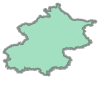

In [31]:
# convert it to a polygon
from shapely.geometry import Point, Polygon
latlng['coord'] = list(zip(latlng['Lng'], latlng['Lat']))

poly = Polygon(latlng['coord'])
poly

In [32]:
# convert it to geodataframe
boundary = gpd.GeoDataFrame(gpd.GeoSeries(poly))
boundary = boundary.rename(columns={0:'geometry'})
boundary['name'] = 'Beijing'

boundary.crs = {'init':'epsg:4326'}
print(boundary.crs)

{'init': 'epsg:4326'}


## Plot house prices

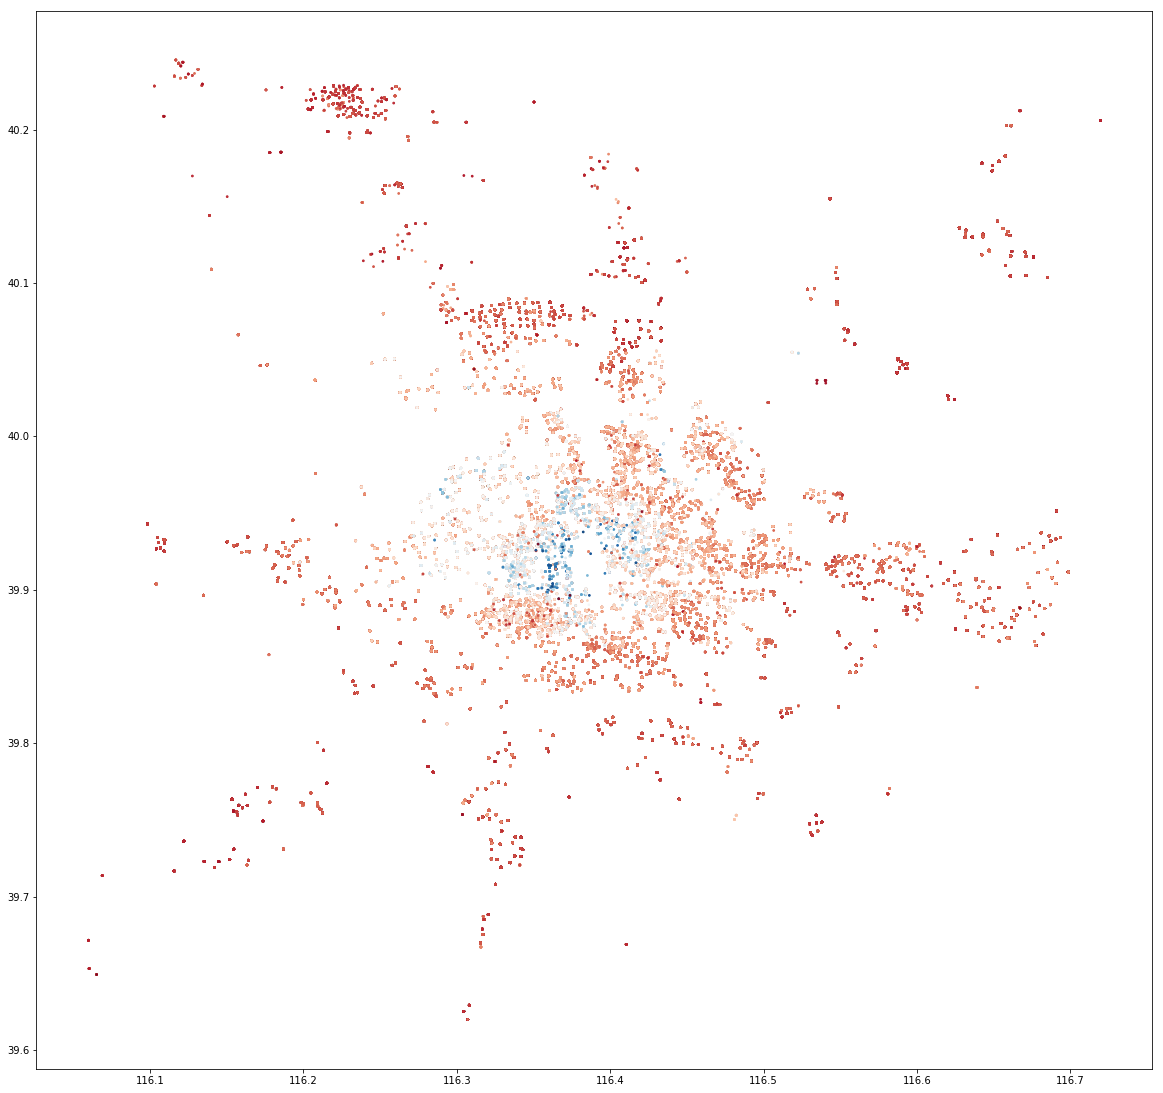

In [33]:
ax = read_gdf.plot(figsize=(20,20), column='price', markersize=3, cmap='RdBu')
# boundary.plot(ax=ax, color='none', edgecolor='black')

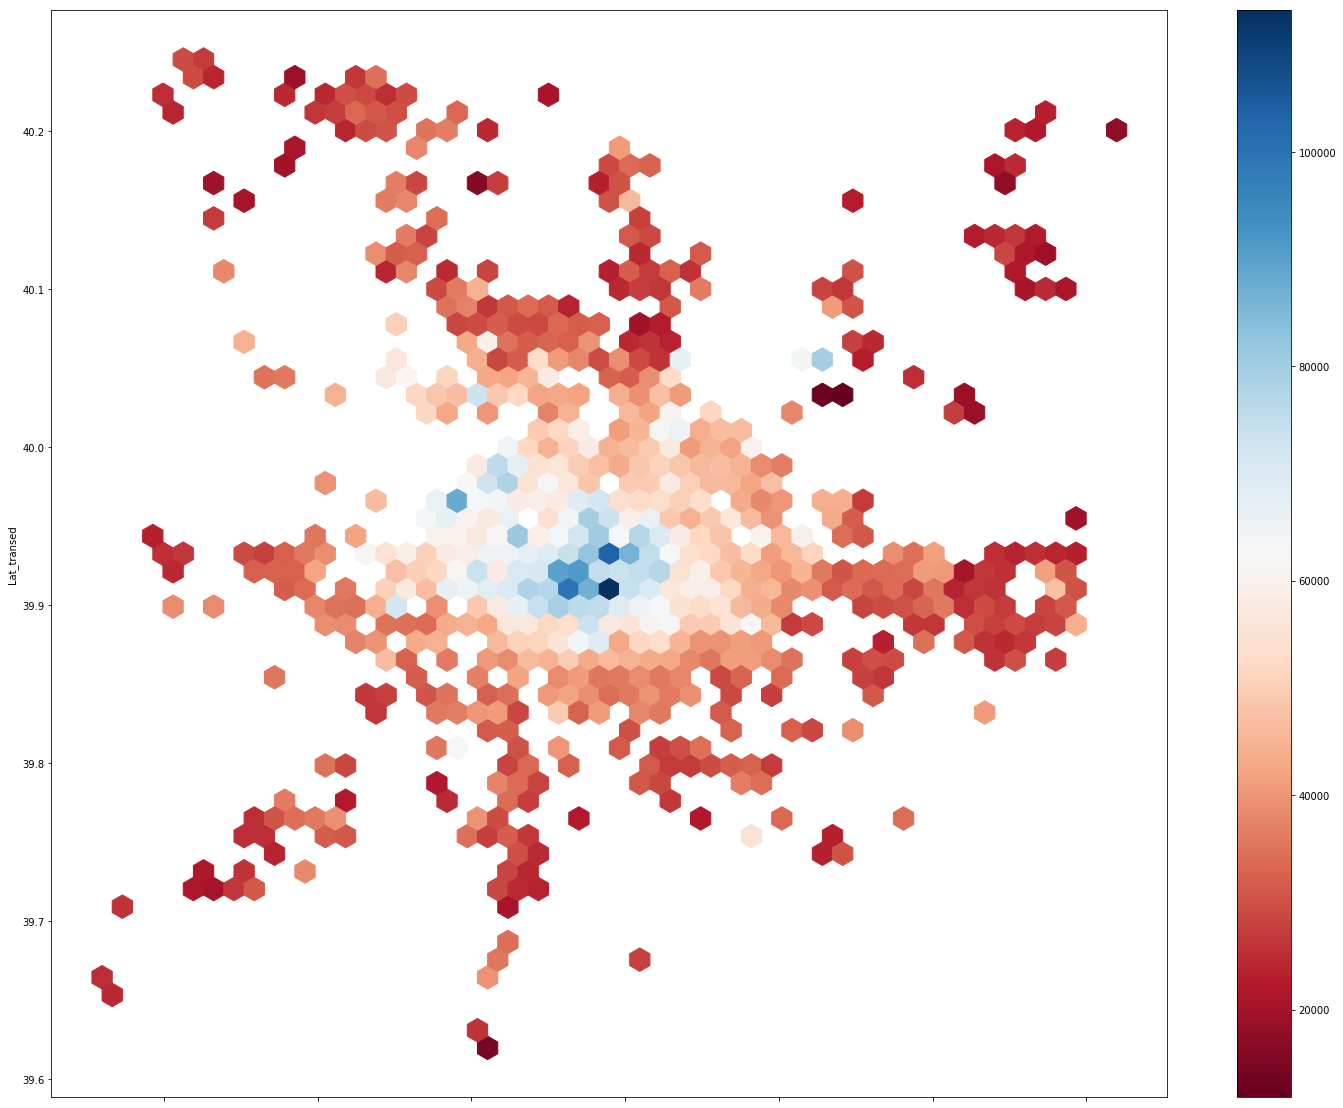

In [34]:
# pandas hexbin
import numpy as np
ax = read.plot.hexbin(x='Lng_transed', y='Lat_transed', C='price', reduce_C_function=np.mean, cmap='RdBu',
                     figsize=(25,20), gridsize=50)

## Plot houseprice by year

In [35]:
# split the dataset by year
d = []
for i in range (2011,2018):
    year = read_gdf.loc[read_gdf['year'] == i]
    year = year.reset_index()
    d.append(year)
    
d.append(read_gdf)
d

[       index  锘縤ndex                                                url  \
 0      92404   92405  https://bj.lianjia.com/chengjiao/BJ0000615609....   
 1      92405   92406  https://bj.lianjia.com/chengjiao/BJ0000615610....   
 2      92406   92407  https://bj.lianjia.com/chengjiao/BJ0000615612....   
 3      92407   92408  https://bj.lianjia.com/chengjiao/BJ0000615615....   
 4      92408   92409  https://bj.lianjia.com/chengjiao/BJ0000615621....   
 5      92409   92410  https://bj.lianjia.com/chengjiao/BJ0000615624....   
 6      92410   92411  https://bj.lianjia.com/chengjiao/BJ0000615625....   
 7      92411   92412  https://bj.lianjia.com/chengjiao/BJ0000615628....   
 8      92412   92413  https://bj.lianjia.com/chengjiao/BJ0000615629....   
 9      92413   92414  https://bj.lianjia.com/chengjiao/BJ0000615635....   
 10     92414   92415  https://bj.lianjia.com/chengjiao/BJ0000615642....   
 11     92415   92416  https://bj.lianjia.com/chengjiao/BJ0000615646....   
 12     9241

In [36]:
vmin, vmax = read['price'].min(), read['price'].max()
print(vmin, vmax)

1 156250


Text(0.5, 1.0, 'Housing Price/(sq m) in 2011-2017')

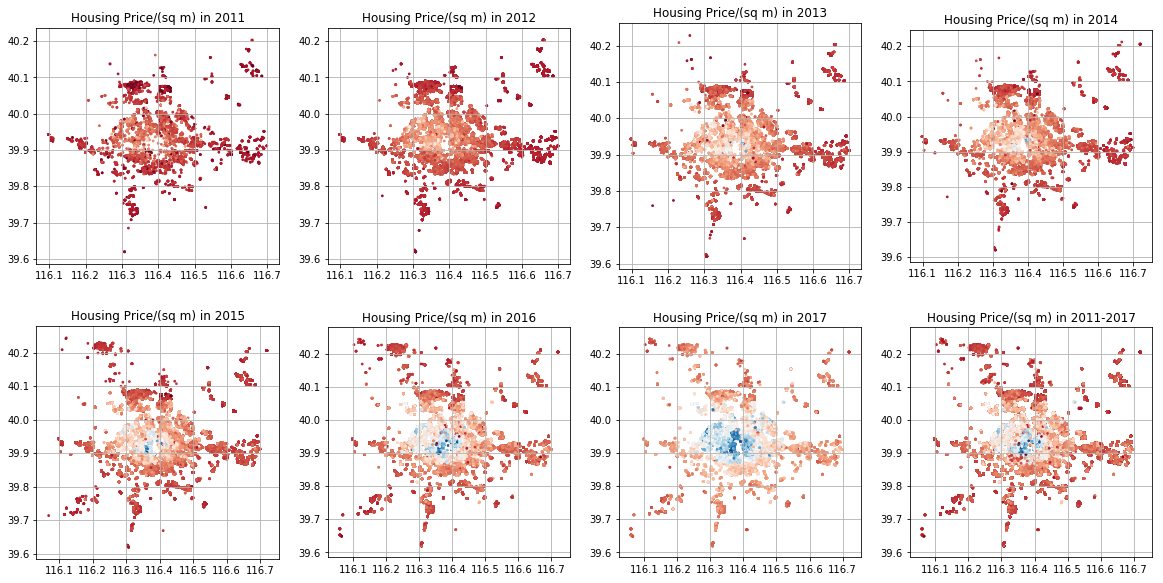

In [37]:
fig, (ax, ay) = plt.subplots(2,4, figsize=(20,10))

for i in range(4):
    d[i].plot(ax=ax[i], column='price', markersize=3, cmap='RdBu', vmin=vmin, vmax=vmax)
    ax[i].grid(True)
    ax[i].set_title('Housing Price/(sq m) in ' + str(i+2011))

    d[i+4].plot(ax=ay[i], column='price', markersize=3, cmap='RdBu', vmin=vmin, vmax=vmax)
    ay[i].grid(True)
    ay[i].set_title('Housing Price/(sq m) in ' + str(i+4+2011))

ay[3].set_title('Housing Price/(sq m) in 2011-2017')
# fig.subplots_adjust(hspace=0.2)